In [1]:
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline


In [2]:
filename="/Users/irffanalahi/Research/weekly/for_8_13_20/roundrobinanalysis/Neu/Hypo_hyper_combined/crc_analysis/bmode/analysis/withlymph/lymphplot/diffdataall_reing50_hypoOnlyposition_intersected_cyberin_scaled_inverted_selectedinverted_CSxOut_lymp.txt_noar3_no1314lymp.txt_onefile"

df=pd.read_csv(filename,sep="\t")

x=  'ground_truth'
y='predicted'
celltype="celltype" #"Cell Type" #"celltype"



xyfixed_lim=False

only_scatter=False

In [3]:
##### beautification ####
if celltype=="celltype":
    df=df.rename(columns = {"celltype":"Cell Type"})
    celltype="Cell Type"

if x== "ground_truth":
    df=df.rename(columns = {"ground_truth":"Ground Truth"})
    x="Ground Truth"
if y== 'predicted':
    df=df.rename(columns = {"predicted":"Predicted"})
    y="Predicted"
    

####df[celltype] = df[celltype].replace(['CD1hgcc9'],'B Chcxell') #### to test the following will be ignored if there is no such cell type

df[celltype] = df[celltype].replace(['CD4'],'CD4 T')
df[celltype] = df[celltype].replace(['CD8'],'CD8 T')
df[celltype] = df[celltype].replace(['CD14'],'Mono')
df[celltype] = df[celltype].replace(['CD19'],'B Cell')






In [4]:
df.corr()

,Predicted,Ground Truth
Predicted,1.000000,0.592394
Ground Truth,0.592394,1.000000


In [5]:
corr = pearsonr(df[x], df[y])

#corr = [np.round(c, 5) for c in corr]
print(corr)
text='r = %s \nP = %s' % (format(corr[0], '.3f'), format(corr[1], ".3e") )

(0.5923937812782742, 9.180647917011282e-06)


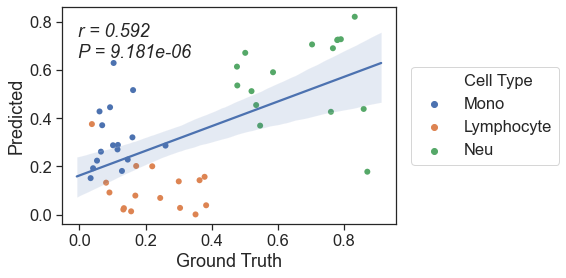

In [6]:
sns.set(style="ticks",font_scale=1.5)
if xyfixed_lim==True:
    plt.xlim([0, 0.8])
    plt.ylim([0, 0.8])

g=sns.scatterplot(df[x], df[y],hue=df[celltype],edgecolor='none')
g.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

if only_scatter==False:
    ax=sns.regplot(df[x], df[y],scatter=False)




    anc = AnchoredText(text, loc="upper left", frameon=False,prop=dict(fontstyle="italic"))
    ax.add_artist(anc)


#default 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']




#hfont = {'fontname':'Helvetica'}
#plt.title('title',**hfont)

savename=filename+"_"+x+"_"+y+".pdf"
plt.savefig(savename,dpi=300,bbox_inches="tight")
plt.show()
#sns.jointplot(data=df, x=x, y=y, kind='reg', hue=df[celltype])